# EHR-ML with complete data

## Read data

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/final/data_matrix.csv')

datamatrixDf.shape

(56237, 125)

## Create train and test splits

In [3]:
from sklearn.model_selection import train_test_split


trainDf, testDf = train_test_split(datamatrixDf[['person_id', 'visit_occurrence_id']].drop_duplicates(), test_size=0.2, random_state=42)

trainDf.shape, testDf.shape

((8916, 2), (2230, 2))

In [4]:
datamatrix_train_df = datamatrixDf.merge(trainDf, how='inner', on=['person_id', 'visit_occurrence_id'])
datamatrix_test_df = datamatrixDf.merge(testDf, how='inner', on=['person_id', 'visit_occurrence_id'])

datamatrix_train_df.shape, datamatrix_test_df.shape

((45058, 125), (11179, 125))

In [8]:
datamatrix_train_df.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/saps_ii/datamatrix_train.csv')
datamatrix_test_df.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/saps_ii/datamatrix_test.csv')

## Build a model

In [5]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Build ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/saps_ii/datamatrix_train.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -wb ''' + str(0) + ''' -wa ''' + str(6) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/saps_ii/model.pkl;'''
    )


2023-12-05 16:39:08,597 - EHR-ML - INFO - Parsing command line arguments
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/saps_ii/datamatrix_train.csv
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.target_column: death_adm
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.window_before: 0
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.window_after: 6
2023-12-05 16:39:08,598 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/saps_ii/model.pkl
2023-12-05 16:39:09,254 - EHR-ML - INFO - Split data to test and train sets
2023-12-05 16:39:09,594 - EHR-ML - INFO - Building standalone models
2023-12-05 16:39:09,594 - EHR-ML - INFO - Models for the label: Full
2023-12-05 16:39:09,629 - EHR-ML - INFO - 

0

## Obtain predictions from the model

In [6]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Predict ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/saps_ii/datamatrix_test.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -mp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/saps_ii/model.pkl -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/saps_ii/preds.csv;'''
    )


2023-12-05 17:02:18,000 - EHR-ML - INFO - Parsing command line arguments
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/saps_ii/datamatrix_test.csv
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.target_column: death_adm
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.window_before: 0
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.window_after: 3
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.model_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/saps_ii/model.pkl
2023-12-05 17:02:18,001 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/saps_ii/preds.csv
2023-12-05 17:02:18,217 - EHR-ML - INFO - Split data to test and train sets
2023-12-05 17:02:18,898 - EHR-ML - INFO - 

0

## Read predictions

In [5]:
import os
import pandas as pd


predsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/saps_ii/preds.csv')
predsDf

,person_id,visit_occurrence_id,preds
0,2473,237159,0.000307
1,2839,163173,0.017230
2,3071,3103539,0.035608
3,3111,3160037,0.012547
4,3570,3342265,0.001519
...,...,...,...
2211,27213578,2769226,0.000340
2212,27214288,2825787,0.000720
2213,27214462,2841565,0.010673
2214,27214485,2709648,0.002803


In [6]:
resultsDf = predsDf.merge(datamatrix_test_df[['person_id', 'visit_occurrence_id', 'death_adm']].drop_duplicates(), on=['person_id', 'visit_occurrence_id'])
resultsDf

,person_id,visit_occurrence_id,preds,death_adm
0,2473,237159,0.000307,0
1,2839,163173,0.017230,1
2,3071,3103539,0.035608,0
3,3111,3160037,0.012547,0
4,3570,3342265,0.001519,0
...,...,...,...,...
2211,27213578,2769226,0.000340,0
2212,27214288,2825787,0.000720,0
2213,27214462,2841565,0.010673,1
2214,27214485,2709648,0.002803,1


## XGB Ensemble performance

/tmp/ipykernel_514057/4126068900.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDf.preds, hist=False, rug=False)


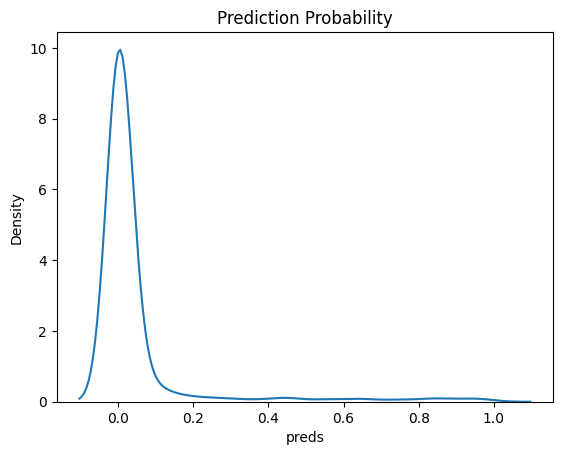

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(resultsDf.preds, hist=False, rug=False)
plt.title('Prediction Probability')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score


print('Discharge mortality accuracy: ', str(accuracy_score([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality accuracy:  0.8885379061371841


In [9]:
from sklearn.metrics import balanced_accuracy_score


print('Discharge mortality balanced accuracy: ', str(balanced_accuracy_score([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality balanced accuracy:  0.7217480415376207


In [11]:
from sklearn.metrics import precision_score


print('Discharge mortality average precision: ', str(precision_score([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality average precision:  0.44664031620553357


In [25]:
from sklearn.metrics import f1_score


print('Discharge mortality F1: ', str(f1_score([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality F1:  0.4778012684989429


In [26]:
from sklearn.metrics import roc_auc_score


print('Discharge mortality AUROC: ', str(roc_auc_score([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality AUROC:  0.7217480415376207


In [27]:
import os
import sys

sys.path.append(os.environ['EICU_EHR_PIPELINE_BASE'] + "/EHR-ML")


from ehrml.utils import MlUtils

print('Discharge mortality MCC-F1: ', str(MlUtils.calculateMccF1([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm)))

Discharge mortality MCC-F1:  0.577118937025392


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10), title='Confusion Matrix for the classifier'):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_perc, annot=annot, fmt='', ax=ax, cmap='RdPu', annot_kws={"size":16})
    #plt.savefig(filename)
    plt.title(title)
    plt.show()


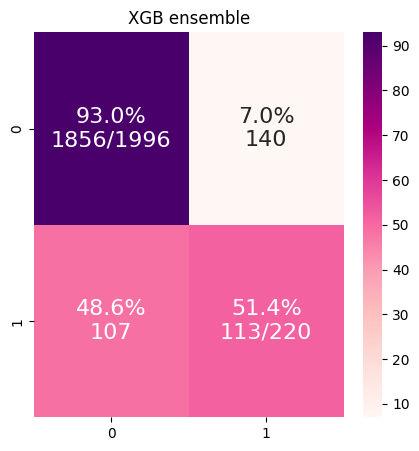

In [22]:
cm_analysis([ 0 if pred < 0.09 else 1 for pred in resultsDf.preds], resultsDf.death_adm, [0, 1], ymap=None, figsize=(5, 5), title='XGB ensemble')

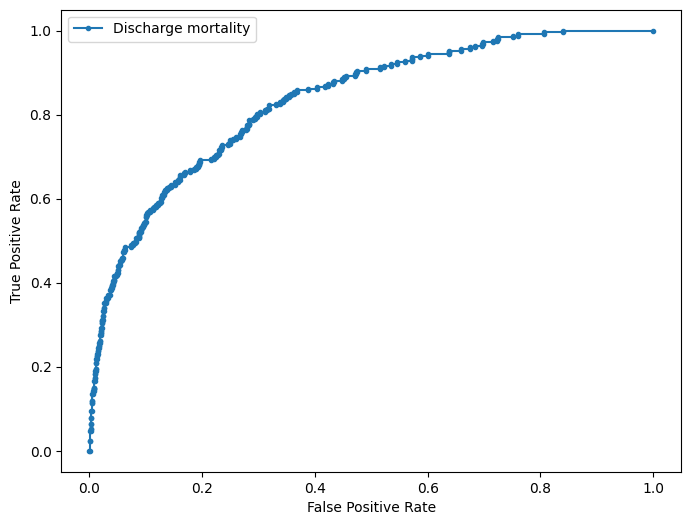

In [16]:
from sklearn.metrics import roc_curve


plt.figure(figsize=(8, 6))

fpr, tpr, _  = roc_curve(resultsDf.death_adm, resultsDf.preds)
plt.plot(fpr, tpr, marker='.', label='Discharge mortality')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
